In [16]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import minmax_scale

### Load Data

In [2]:
boston_df = pd.read_csv('datasets/boston.csv')

In [3]:
boston_df.shape

(506, 13)

In [4]:
boston_df.head()

,crime rate,residential land zone,business acres,Charles River,nitric oxides,number of rooms,age,distances to employment centres,accessibility to highways,property-tax,pupil-teacher ratio,lower income levels,Median Home Value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [6]:
X = boston_df.drop('Median Home Value', axis = 1)
Y = boston_df['Median Home Value']

### Apply variance filter
* When a feature doesn’t vary much within itself, it generally has very little predictive power.

In [13]:
X.var(axis = 0)

crime rate                            73.986578
residential land zone                543.936814
business acres                        47.064442
Charles River                          0.064513
nitric oxides                          0.013428
number of rooms                        0.493671
age                                  792.358399
distances to employment centres        4.434015
accessibility to highways             75.816366
property-tax                       28404.759488
pupil-teacher ratio                    4.686989
lower income levels                   50.994760
dtype: float64

In [20]:
X_scaled = pd.DataFrame(minmax_scale(X, feature_range=(0, 10)), columns=X.columns)

X_scaled.var(axis = 0)

crime rate                          0.934689
residential land zone               5.439368
business acres                      6.324179
Charles River                       6.451297
nitric oxides                       5.684955
number of rooms                     1.812437
age                                 8.403945
distances to employment centres     3.666542
accessibility to highways          14.332016
property-tax                       10.344953
pupil-teacher ratio                 5.304424
lower income levels                 3.882837
dtype: float64

In [21]:
X_scaled.describe()

,crime rate,residential land zone,business acres,Charles River,nitric oxides,number of rooms,age,distances to employment centres,accessibility to highways,property-tax,pupil-teacher ratio,lower income levels
count,506.000000,506.000000,506.000000,506.00000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.405441,1.136364,3.913775,0.69170,3.491668,5.218690,6.763636,2.423813,3.717134,4.222083,6.229291,3.014090
std,0.966793,2.332245,2.514792,2.53994,2.384314,1.346268,2.898956,1.914822,3.785765,3.216357,2.303134,1.970492
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.008511,0.000000,1.733871,0.00000,1.316872,4.453918,4.338311,0.882590,1.304348,1.755725,5.106383,1.440397
50%,0.028121,0.000000,3.383431,0.00000,3.148148,5.072811,7.682801,1.889487,1.739130,2.729008,6.861702,2.657285
75%,0.412585,1.250000,6.466276,0.00000,4.917695,5.867982,9.389804,3.690881,10.000000,9.141221,8.085106,4.201159
max,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [41]:
from sklearn.feature_selection import VarianceThreshold

select_features = VarianceThreshold(threshold = 5.0)

In [42]:
X_new = select_features.fit_transform(X_scaled)

In [43]:
X_new.shape

(506, 8)

In [44]:
var_df = pd.DataFrame({'feature names' : list(X),
                       'variances' : select_features.variances_
                      })

var_df

,feature names,variances
0,crime rate,0.932841
1,residential land zone,5.428618
2,business acres,6.311681
3,Charles River,6.438548
4,nitric oxides,5.673720
5,number of rooms,1.808855
6,age,8.387336
7,distances to employment centres,3.659295
8,accessibility to highways,14.303692
9,property-tax,10.324509


In [45]:
X_new = pd.DataFrame(X_new)

X_new.head()

,0,1,2,3,4,5,6,7
0,1.8,0.678152,0.0,3.148148,6.416066,0.000000,2.080153,2.872340
1,0.0,2.423021,0.0,1.728395,7.826982,0.434783,1.049618,5.531915
2,0.0,2.423021,0.0,1.728395,5.993821,0.434783,1.049618,5.531915
3,0.0,0.630499,0.0,1.502058,4.418126,0.869565,0.667939,6.489362
4,0.0,0.630499,0.0,1.502058,5.283213,0.869565,0.667939,6.489362


In [46]:
selected_features = []

for i in range(len(X_new.columns)):
    for j in range(len(X_scaled.columns)):

        if(X_new.iloc[:,i].equals( X_scaled.iloc[:,j])):
            selected_features.append(X_scaled.columns[j])
            
selected_features

['residential land zone',
 'business acres',
 'Charles River',
 'nitric oxides',
 'age',
 'accessibility to highways',
 'property-tax',
 'pupil-teacher ratio']

In [47]:
rejected_features = set(list(X)) - set(selected_features)

rejected_features

{'crime rate',
 'distances to employment centres',
 'lower income levels',
 'number of rooms'}

In [48]:
x_train, x_test, y_train, y_test = train_test_split(X_new, Y, test_size = 0.2)

In [49]:
x_train.shape, y_train.shape

((404, 8), (404,))

In [50]:
x_test.shape, y_test.shape

((102, 8), (102,))

### Regression in Statsmodel

https://www.statsmodels.org/stable/regression.html

In [51]:
x_train_with_const = sm.add_constant(x_train)

model = sm.OLS(y_train, x_train_with_const)

In [52]:
result = model.fit()

In [53]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:      Median Home Value   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     34.48
Date:                Fri, 15 Mar 2019   Prob (F-statistic):           3.47e-41
Time:                        12:57:41   Log-Likelihood:                -1351.8
No. Observations:                 404   AIC:                             2722.
Df Residuals:                     395   BIC:                             2758.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.5147      1.695     22.139      0.0

### Build Linear Regression Model

In [54]:
reg_model = LinearRegression().fit(x_train, y_train)

### Evaluate Model

In [55]:
print('Training score: ', reg_model.score(x_train, y_train))

Training score:  0.4112109709185371


In [56]:
y_pred = reg_model.predict(x_test)

In [57]:
print('Testing score: ', r2_score(y_test, y_pred))

Testing score:  0.4128041487774866


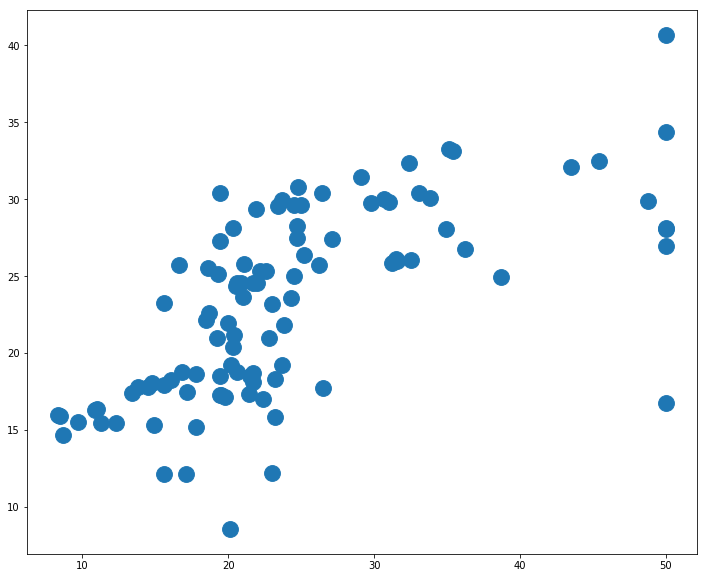

In [58]:
plt.figure(figsize = (12, 10))

plt.scatter(y_test.values, y_pred, s=250)

plt.show()